### REGRESIÓN LOGÍSTICA MULTINOMIAL

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



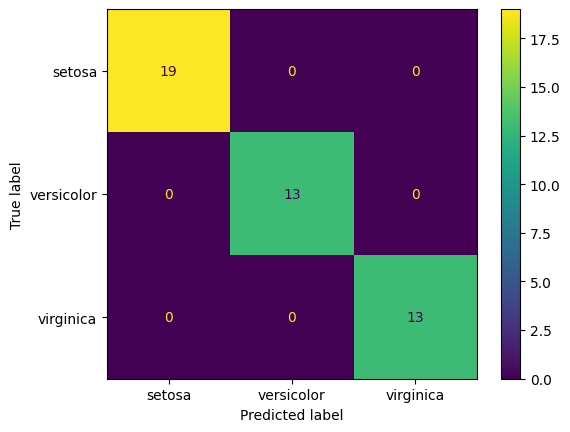

In [29]:
from matplotlib.pylab import multinomial
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 

# Cargamos el dataset Iris
iris = load_iris()

# Definimos las variables X e y
X = iris.data
y = iris.target
#X, y = iris.data, iris.target

# Dividimos el dataset en entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Estandarizamos los datos
escaler = StandardScaler()
X_train = escaler.fit_transform(X_train)
X_test = escaler.transform(X_test)

#Crear el modelo de regresión logística multinomial 
model = LogisticRegression(solver='lbfgs', max_iter=500) # multinomial es para problemas de clasificación multiclase

# Entrenamos el modelo
model.fit(X_train, y_train)

# Realizamos predicciones
y_pred = model.predict(X_test)

# Mostramos el reporte de clasificación
print(classification_report(y_test, y_pred, target_names=iris.target_names))

# Matriz de confusión
matrix = ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, display_labels=iris.target_names)

plt.show()


### MATRIZ DE CONFUSIÓN

Me permite evaluar el rendimiento de un modelo de clasificación. Muestra la cantidad de predicciones correctas e incorrectas que el modelo va a hacer para cada clase. 
- Filas: representan las instancias de una clase real
- Columnas representar las instancias de una clase predicha. 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       0.98      0.94      0.96        50
           2       0.94      1.00      0.97        47
           3       1.00      0.93      0.96        54
           4       1.00      0.98      0.99        60
           5       0.95      0.95      0.95        66
           6       0.98      0.98      0.98        53
           7       1.00      0.98      0.99        55
           8       0.89      0.98      0.93        43
           9       0.95      0.97      0.96        59

    accuracy                           0.97       540
   macro avg       0.97      0.97      0.97       540
weighted avg       0.97      0.97      0.97       540



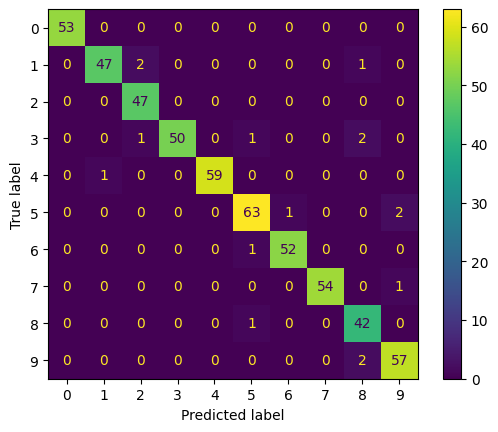

In [30]:
from sklearn.datasets import load_digits # Importamos el dataset de dígitos

# Cargamos el dataset de dígitos
digits = load_digits()
X, y = digits.data, digits.target # "X" son los datos de imágenes con los dígitos. "y" son las etiquetas (dígitos del 0 al 9)



# Dividimos el dataset en entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Estandarizamos los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Creamos el modelo de regresión logística multinomial
model = LogisticRegression(max_iter=500)

# Entrenamos el modelo
model.fit(X_train, y_train)

# Realizamos predicciones
y_pred = model.predict(X_test)

# Mostramos el reporte de clasificación
print(classification_report(y_test, y_pred))

# Matriz de confusión
matrix = ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
plt.show()


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        48
           2       1.00      1.00      1.00        13

    accuracy                           1.00        90
   macro avg       1.00      1.00      1.00        90
weighted avg       1.00      1.00      1.00        90



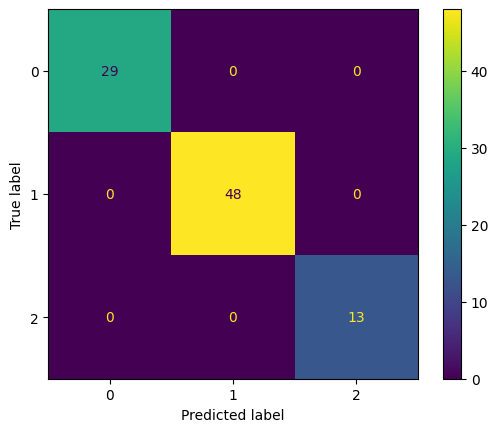

In [31]:
import numpy as np
import pandas as pd
# Generar datos sintéticos para ejemplo de clasificación de especies de animales 
# Etiquetas: 0 Mamíferos, 1 Aves, 2 Reptiles
# Características: 0 Pelo, 1 Plumas, 2 Escamas

np.random.seed(42)
n_samples = 300

# Características de los animales
temperatura = np.random.choice([35, 37, 40], n_samples)
num_patas = np.random.choice([0, 2, 4], n_samples)
plumas = np.random.choice([0, 1], n_samples)

# Etiquetas de los animales
# Etiquetas: 0 Mamíferos, 1 Aves, 2 Reptiles
y = np.where(plumas == 1, 1, np.where(temperatura >= 37, 0, 2))
# Si el animal tiene plumas es un ave (1)
# Si la temperatura es mayor o igual a 37 grados es un mamífero (0)
# Si la temperatura es menor a 37 grados es un reptil (2)

# Creamos el DataFrame con las características y las etiquetas
df = pd.DataFrame({
    'temperatura': temperatura,
    'num_patas': num_patas,
    'plumas': plumas,
    'Clase': y
})

# Separar las características de las etiquetas
X = df[['temperatura', 'num_patas', 'plumas']]
y = df['Clase']

# Dividimos el dataset en entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Creamos el modelo de regresión logística multinomial
model = LogisticRegression(max_iter=500)

# Entrenamos el modelo
model.fit(X_train, y_train)

# Realizamos predicciones
y_pred = model.predict(X_test)

# Mostramos el reporte de clasificación
print(classification_report(y_test, y_pred))

# Matriz de confusión
matrix = ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
plt.show()



In [32]:
import numpy as np  # Asegúrate de importar numpy
import pandas as pd  # Importa pandas

# Función para predecir la clase de un animal
def predecir_animal():
    # Solita al usuario los datos del nuevo registro
    print("Introduce los datos del nuevo registro para predecir su clase:")
    temperatura = float(input("Temperatura del animal: (Elige entre 35, 37 o 40) "))
    num_patas = int(input("Número de patas del animal: (Elige entre 0, 2 o 4) "))
    pluma = int(input("El animal tiene plumas? (0: No, 1: Sí): "))

    # Crear un DataFrame de pandas con los mismos nombres de columna
    X_new = pd.DataFrame([[temperatura, num_patas, pluma]], columns=['Temperatura', 'Patas', 'Plumas'])

    # Realizar la predicción con el modelo
    y_new = model.predict(X_new)

    # Mostrar el resultado de la predicción
    if y_new == 0:
        print("El animal es un Mamífero")
    elif y_new == 1:
        print("El animal es un Ave")
    else:
        print("El animal es un Reptil")

# Llamar a la función para predecir la clase de un animal
#predecir_animal()


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      1.00      1.00        23
           2       1.00      1.00      1.00        42

    accuracy                           1.00        90
   macro avg       1.00      1.00      1.00        90
weighted avg       1.00      1.00      1.00        90



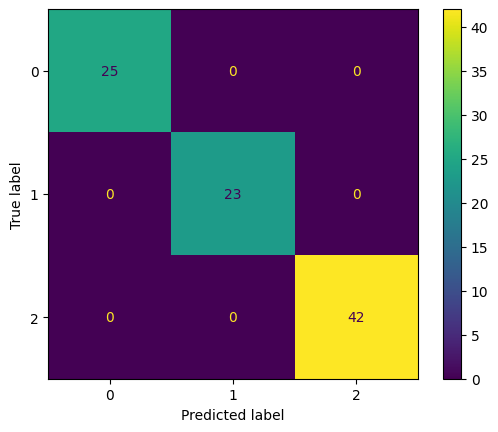

In [33]:
# Generamos datos sintéticos
np.random.seed(42)
n_samples = 300

# Características 
ruedas = np.random.choice([2, 4, 6, 8], size=n_samples)
capacidad_pasajeros = np.random.choice([1, 2, 4, 6], size=n_samples)
carga_maxima = np.random.choice([50, 200, 500, 2000, 5000], size=n_samples)

# Etiquetas
y = np.where(ruedas == 2 , 0, np.where(ruedas == 4, 1, 2 ))# Clase 0: Moto, Clase 1: Coche, Clase 2: Camión, Clase 3: No catalogado

# Creamos el DataFrame con las características y las etiquetas
df = pd.DataFrame({
    'ruedas': ruedas,
    'capacidad_pasajeros': capacidad_pasajeros,
    'carga_maxima': carga_maxima,
    'Clase': y
})

# Separar las características de las etiquetas
X = df[['ruedas', 'capacidad_pasajeros', 'carga_maxima']]
y = df['Clase']

# Dividimos el dataset en entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Creamos el modelo de regresión logística multinomial
model = LogisticRegression(max_iter=500)

# Entrenamos el modelo
model.fit(X_train, y_train)

# Realizamos predicciones
y_pred = model.predict(X_test)

# Mostramos el reporte de clasificación
print(classification_report(y_test, y_pred))

# Matriz de confusión
matrix = ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

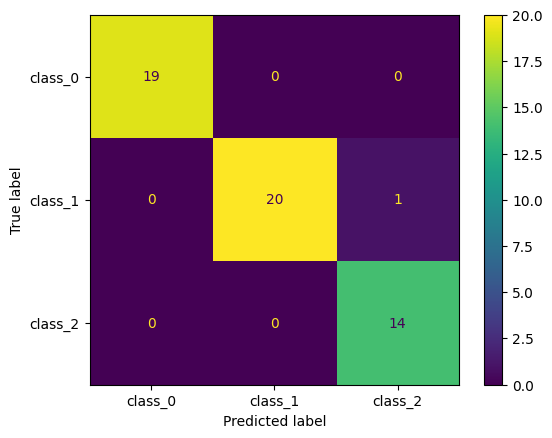

In [34]:
from sklearn.datasets import load_wine

# Cargamos el dataset Wine
wine = load_wine()
df = pd.DataFrame(wine.data, columns=wine.feature_names)
df['target'] = wine.target
print(df.info())

# Separar las características de las etiquetas
X = df.drop('target', axis=1)
y = df['target']

# Dividimos el dataset en entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Estandarizamos los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Creamos el modelo de regresión logística multinomial
model = LogisticRegression(max_iter=500)

# Entrenamos el modelo
model.fit(X_train, y_train)

# Realizamos predicciones
y_pred = model.predict(X_test)

# Mostramos el reporte de clasificación
print(classification_report(y_test, y_pred, target_names=wine.target_names))

# Matriz de confusión
matrix = ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, display_labels=wine.target_names)
plt.show()

